In [12]:
from pymoo.problems.many import DTLZ1
from pymoo.problems.multi import ZDT3
from pyagamo.objectives import Problem_pymoo
from pyagamo.players import ClonalSelection
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.es import ES
from pyagamo.players import Algorithm_pymoo
from pyagamo import AGAMO
import time
import matplotlib.pyplot as plt

In [13]:
max_eval = 10000
npop = 25
change_iter = 1
next_iter = -1
max_front = 100
player_parm = { "nclone": 15, "mutate_args": [0.45, 0.9, 0.01], 'sup': 0.0}

In [45]:
#n_var = 7
#n_obj = 3
#objs = [Problem_pymoo(i, i+1, DTLZ1(n_var=n_var, n_obj=n_obj)) for i in range(n_obj)]
n_var = 30
n_obj = 2
objs = [Problem_pymoo(i, i+1, ZDT3(n_var=n_var)) for i in range(n_obj)]
players = [Algorithm_pymoo(i, npop, DE) for i in range(n_obj)]
#players = [ClonalSelection(i, npop, player_parm) for i in range(n_obj)]

In [46]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

In [47]:
agamo.start_optimize()
res=agamo.get_results()
agamo.close()

10018.0eval [00:04, 2260.79eval/s]                        


In [48]:
res

{'stop_flag': True,
 'front': array([[2.59840894e-17, 7.72124971e-05, 4.73752541e-01, 3.50910222e-01,
         9.57138030e-02, 1.67801356e-01, 1.75286316e-01, 1.42820078e-01,
         1.26180711e-01, 1.33033467e-01, 1.19511860e-01, 5.84264784e-01,
         2.52740851e-02, 3.86181857e-02, 1.31905117e-01, 4.68466480e-02,
         4.64865358e-01, 5.64062661e-01, 1.84299275e-02, 3.03601167e-01,
         6.37069258e-01, 2.15016182e-01, 3.24866773e-01, 7.74887844e-01,
         6.53905990e-02, 5.96548084e-02, 3.69038791e-02, 2.28566953e-01,
         2.99513345e-01, 4.66504465e-01],
        [4.08141850e-17, 4.13539974e-02, 5.63481080e-01, 1.31266099e-01,
         7.45412268e-02, 4.53021657e-04, 1.09459854e-01, 1.60821152e-01,
         2.51289894e-02, 3.78397401e-03, 1.88908986e-01, 6.85354724e-01,
         2.52740851e-02, 3.68305922e-01, 9.73774521e-02, 7.66673786e-02,
         4.81986138e-01, 1.07075234e-01, 1.27738465e-01, 1.54490154e-01,
         4.65286188e-01, 6.35982094e-02, 1.92244736e-

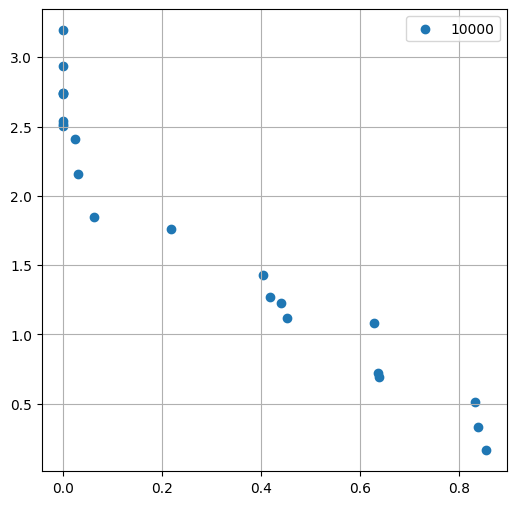

In [49]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111)
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], marker='o', label=str(max_eval))
ax.grid(True)
#ax.view_init(30, 30)
plt.legend()
plt.show()

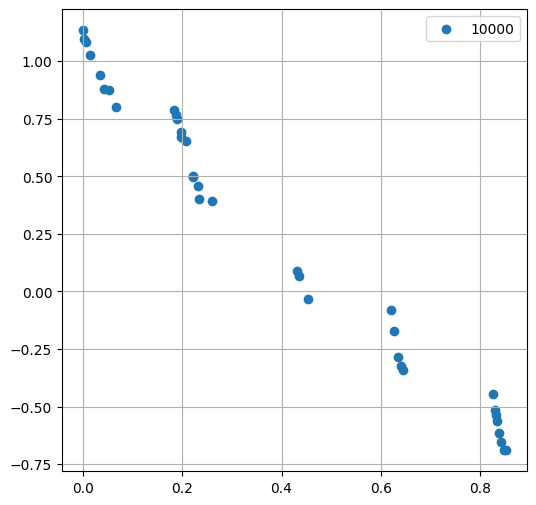

In [10]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111)
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], marker='o', label=str(max_eval))
ax.grid(True)
#ax.view_init(30, 30)
plt.legend()
plt.show()

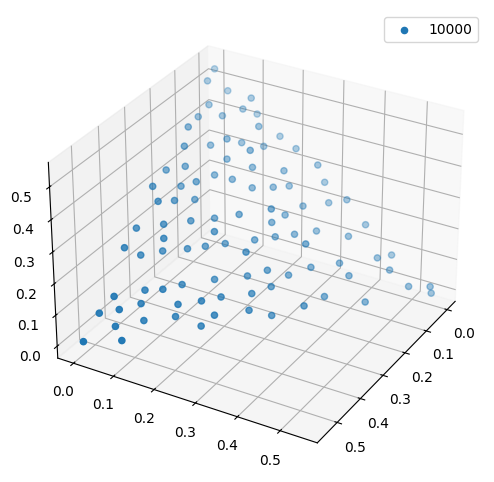

In [7]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=str(max_eval))
ax.grid(True)
ax.view_init(30, 30)
plt.legend()
plt.show()

In [8]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

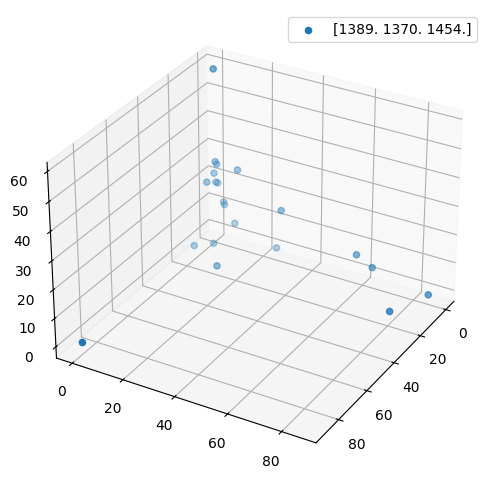

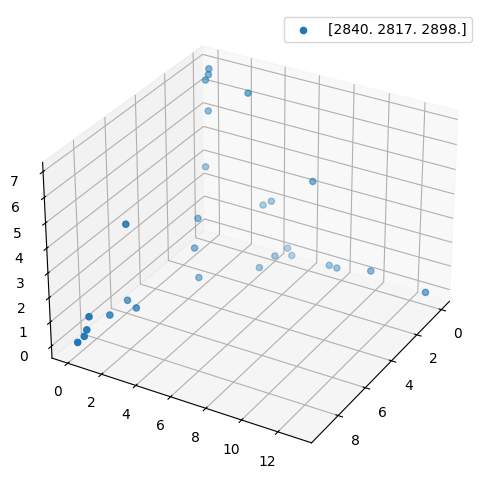

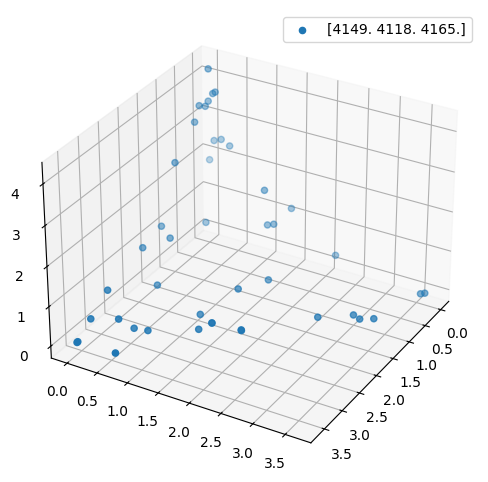

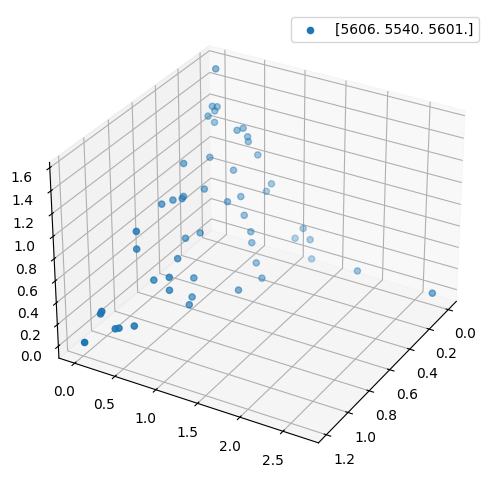

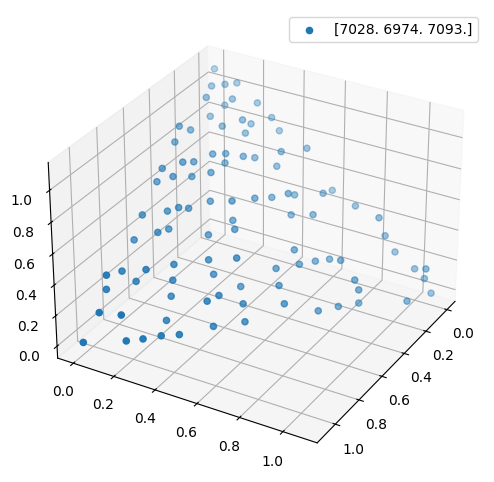

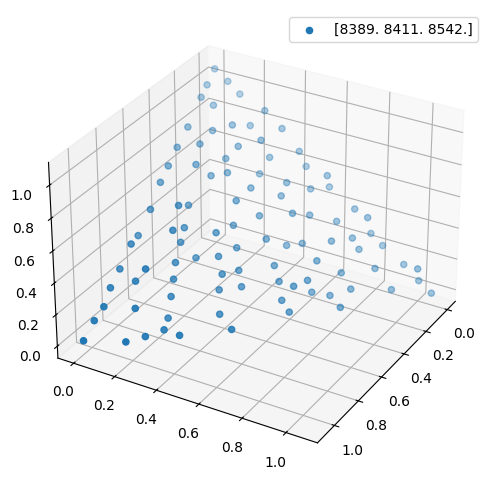

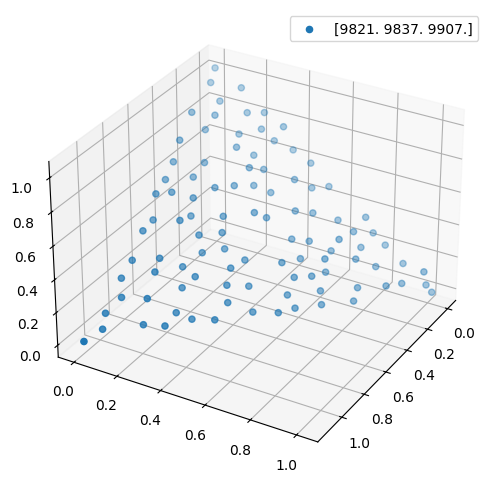

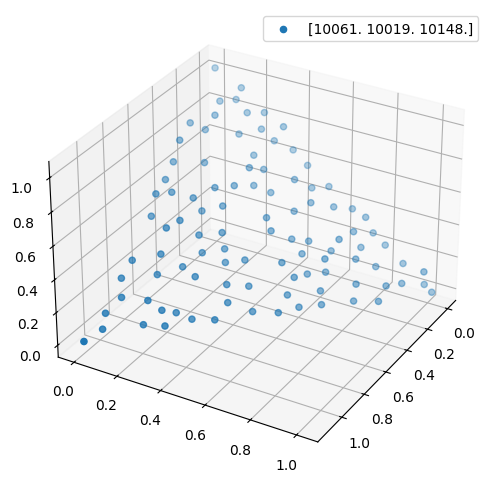

In [9]:
agamo.start_optimize(thread=True)
res=agamo.get_results()
while not res.get('stop_flag', False):
    res=agamo.get_results()
    front_eval = res.get('front_eval', None)
    if (front_eval is not None) and len(front_eval)>0:
        ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
        ax.grid(True)
        ax.view_init(30, 30)
        ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=res['evaluations']+res['evaluations_m'])
        plt.legend()
        plt.show()
    time.sleep(1)
    #print(res.get('iterations', 'brak'))
agamo.close()

In [12]:
res

{'stop_flag': True,
 'front': array([[13.36978757, 12.46824314, 46.63461383, 22.52507512],
        [12.07073424, 12.36435071, 36.8575968 , 26.80125841],
        [12.48153969, 12.17285037, 31.5146081 , 31.42431809],
        [12.41785335, 12.46824314, 31.02171894, 30.77387887],
        [12.36160291, 12.46824314, 30.27482547, 30.77387887],
        [12.08941487, 12.        , 29.47101123, 30.16034691],
        [12.36160291, 12.36435071, 29.47101123, 29.1199531 ],
        [12.20564672, 12.36435071, 27.57317405, 27.62912307],
        [12.36160291, 12.        , 27.53129067, 26.80125841],
        [12.48153969, 12.36435071, 26.85553179, 26.80125841],
        [12.36160291, 12.        , 25.73411742, 26.80125841],
        [12.20564672, 12.        , 25.51508879, 25.70261659],
        [12.48153969, 12.        , 25.51508879, 24.60215229],
        [12.48153969, 12.        , 24.9994773 , 24.60215229],
        [12.48153969, 12.46824314, 23.51612949, 24.60215229],
        [12.08941487, 12.46824314, 23.516